# Esercitazione 7

In [1]:
%run 'Base_Load.ipynb'

In [2]:
def fluke_sd(x):
    if(isinstance(x, int)): 
        s = str(x)
        ret = 1
    else:
        s = str(x)
        for k in range(len(s)):
            if (s[k] == '.'):
                a = k
        ret = 2*10**(-len(s[a+1:]))
    sd= 0.5/100*x + ret
    return (sd)


def multi_fluke_sd(x): # BISOGNA DARE UNA LISTA, NON UN ARRAY
    sd = []
    for i in range(len(x)):
        ret = fluke_sd(x[i])
        sd.append(ret)
    sd = array(sd)
    return (sd)

## Contatore

In [25]:
R0 =
R1 =
R2 =
R3 =

sdR0 = fluke_sd(R0)
sdR1 = fluke_sd(R1)
sdR2 = fluke_sd(R2)
sdR3 = fluke_sd(R3)

print("R0:",R0,"   sd:",sdR0)
print("R1:",R1,"   sd:",sdR1)
print("R2:",R2,"   sd:",sdR2)
print("R3:",R3,"   sd:",sdR3)

SyntaxError: invalid syntax (<ipython-input-25-cb6163aac06f>, line 1)

##### Commentare il fatto che non possiamo dare un clock manuale

In [26]:
V0 = array([128.12e-3 , 3.222])
V1 = array([179.53e-3 , 3.1747])
V2 = array([190.23e-3 , 3.205])
V3 = array([143.19e-3 , 3.332])

sdV0 = 0.5*V0/100
sdV1 = 0.5*V1/100
sdV2 = 0.5*V2/100
sdV3 = 0.5*V3/100

print("LOGIC 0:")
print("V0:",V0[0],"   sd:",sdV0[0])
print("V1:",V1[0],"   sd:",sdV1[0])
print("V2:",V2[0],"   sd:",sdV2[0])
print("V3:",V3[0],"   sd:",sdV3[0])
print("")
print("LOGIC 1:")
print("V0:",V0[1],"   sd:",sdV0[1])
print("V1:",V1[1],"   sd:",sdV1[1])
print("V2:",V2[1],"   sd:",sdV2[1])
print("V3:",V3[1],"   sd:",sdV3[1])

LOGIC 0:
V0: 0.12812    sd: 0.0006406
V1: 0.17953    sd: 0.00089765
V2: 0.19023    sd: 0.00095115
V3: 0.14319    sd: 0.00071595

LOGIC 1:
V0: 3.222    sd: 0.01611
V1: 3.1747    sd: 0.0158735
V2: 3.205    sd: 0.016025
V3: 3.332    sd: 0.01666


In [27]:
Vref = mean(array([V0[1],V1[1],V2[1],V3[1]]))
sdVref = std(array([V0[1],V1[1],V2[1],V3[1]]))

V0mean = mean(array([V0[0],V1[0],V2[0],V3[0]]))
sdV0mean = std(array([V0[0],V1[0],V2[0],V3[0]]))

print("Vref:",Vref,"   sd:",sdVref)
print("Vmin:",V0mean,"   sd:",sdV0mean)

Vref: 3.233425    sd: 0.0593804839573
Vmin: 0.1602675    sd: 0.0254651628455


In [28]:
data = pd.DataFrame(np.column_stack([ array([V0[0],V1[0],V2[0],V3[0]])*10**3 , array([sdV0[0],sdV1[0],sdV2[0],sdV3[0]])*10**3  , array([V0[1],V1[1],V2[1],V3[1]]) ,  array([sdV0[1],sdV1[1],sdV2[1],sdV3[1]])   ]))
print(tabulate(data, tablefmt="latex_raw", showindex = False, floatfmt=(".3f",".3f",".3f",".3f"), headers=["$V_0$ [mV]", "$sdV_0$ [mV]" ,"$V_1$ [V]" , "$sdV_0$ [V]"]))

\begin{tabular}{rrrr}
\hline
   $V_0$ [mV] &   $sdV_0$ [mV] &   $V_1$ [V] &   $sdV_0$ [V] \\
\hline
      128.120 &          0.641 &       3.222 &         0.016 \\
      179.530 &          0.898 &       3.175 &         0.016 \\
      190.230 &          0.951 &       3.205 &         0.016 \\
      143.190 &          0.716 &       3.332 &         0.017 \\
\hline
\end{tabular}


## DAC

In [46]:
R = 1.0001
R2 = 2.01
R4 = 4.00
R8 = 8.04

Rp = 1.62


sdR = fluke_sd(R)
sdR2 = fluke_sd(R2)
sdR4 = fluke_sd(R4)
sdR8 = fluke_sd(R8)
sdRp = fluke_sd(Rp)


print("R:",R,"   sd:",sdR)
print("R2:",R2,"   sd:",sdR2)
print("R4:",R4,"   sd:",sdR4)
print("R8:",R8,"   sd:",sdR8)
print("Rp:",Rp,"   sd:",sdRp)

R: 1.0001    sd: 0.005200499999999999
R2: 2.01    sd: 0.03005
R4: 4.0    sd: 0.22
R8: 8.04    sd: 0.060200000000000004
Rp: 1.62    sd: 0.0281


In [47]:
def Vout(Vriferimento,a0,a1,a2,a3):
    return -Vriferimento * Rp/(8*R) * (a0 + 2*a1 + 4*a2 + 8*a3)

### Verifica  DAC

In [48]:
Vin = 4.935

In [49]:
Vo0 = -7.882
sdVo0 = 0.5*Vo0/100

Vo0_teo = Vout(Vin,0,0,0,1)
sdVo0_teo = 1*Vo0_teo/100 # farla inventare a lollo

print("Vo0:",Vo0,"   sd:",sdVo0)
print("Vo0_teo:",Vo0_teo,"   sd:",sdVo0_teo)

Vo0: -7.882    sd: -0.03941
Vo0_teo: -7.993900609939006    sd: -0.07993900609939006


In [50]:
Vo1 = -3.966
sdVo1 = 0.5*Vo1/100

Vo1_teo = Vout(Vin,0,0,1,0)
sdVo1_teo = 1*Vo1_teo/100 # farla inventare a lollo

print("Vo1:",Vo1,"   sd:",sdVo1)
print("Vo1_teo:",Vo1_teo,"   sd:",sdVo1_teo)

Vo1: -3.966    sd: -0.01983
Vo1_teo: -3.996950304969503    sd: -0.03996950304969503


In [51]:
Vo2 = -1.983
sdVo2 = 0.5*Vo2/100

Vo2_teo = Vout(Vin,0,1,0,0)
sdVo2_teo = 1*Vo2_teo/100 # farla inventare a lollo

print("Vo2:",Vo2,"   sd:",sdVo2)
print("Vo2_teo:",Vo2_teo,"   sd:",sdVo2_teo)

Vo2: -1.983    sd: -0.009915
Vo2_teo: -1.9984751524847515    sd: -0.019984751524847515


In [52]:
Vo3 = -0.988
sdVo3 = 0.5*Vo3/100

Vo3_teo = Vout(Vin,1,0,0,0)
sdVo3_teo = 1*Vo3_teo/100 # farla inventare a lollo

print("Vo3:",Vo3,"   sd:",sdVo3)
print("Vo3_teo:",Vo3_teo,"   sd:",sdVo3_teo)

Vo3: -0.988    sd: -0.00494
Vo3_teo: -0.9992375762423757    sd: -0.009992375762423757


###### Commentare la coerenza tra valore aspettato e valore misurato

In [53]:
data = pd.DataFrame(np.column_stack([ array([Vo0,Vo1,Vo2,Vo3]) , array([sdVo0,sdVo1,sdVo2,sdVo3]), array([Vo0_teo,Vo1_teo,Vo2_teo,Vo3_teo]) , array([sdVo0_teo,sdVo1_teo,sdVo2_teo,sdVo3_teo])  ]))
print(tabulate(data, tablefmt="latex_raw", showindex = False, floatfmt=(".3f",".3f",".3f",".3f"), headers=["$V_0$ [mV]", "$sdV_0$ [mV]" ,"$V_{0,teo}$ [V]" , "$sdV_{0,teo}$ [V]"]))

\begin{tabular}{rrrr}
\hline
   $V_0$ [mV] &   $sdV_0$ [mV] &   $V_{0,teo}$ [V] &   $sdV_{0,teo}$ [V] \\
\hline
       -7.882 &         -0.039 &            -7.994 &              -0.080 \\
       -3.966 &         -0.020 &            -3.997 &              -0.040 \\
       -1.983 &         -0.010 &            -1.998 &              -0.020 \\
       -0.988 &         -0.005 &            -0.999 &              -0.010 \\
\hline
\end{tabular}


## Verifica DAC + Contatore

In [64]:
Vout = -array([560e-3, 1.36, 2.16, 2.92, 3.74, 4.52, 5.32, 6.16, 7.32, 8.12, 8.88, 9.64, 10.5, 11.2, 12.1]) #misurare partendo da 0
sdVout = 5*Vout/100

-0.832214285714


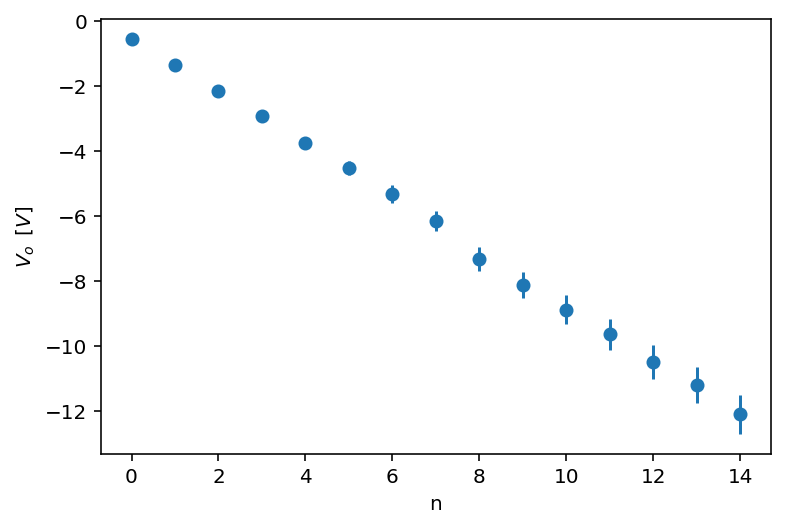

In [67]:
i = array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xlabel("n")
ylabel("$V_o\,\,\,[V]$") 
errorbar(i, Vout, yerr = sdVout, fmt='o')

m,q = polyfit(i, Vout,1)
print(m)

savefig("vout.pdf")

In [56]:
res = (Vout-(m*i+q))**2/sdVout**2
chi2 = sum(res)
print("Chi2 = ",chi2)

Chi2 =  11.471585176


In [57]:
Vout[14]

-12.1

In [73]:
DV = -array([560e-3, 1.36, 2.16, 2.92, 3.74, 4.52, 5.32, 6.16, 7.32, 8.12, 8.88, 9.64, 10.5, 11.2, 12.1])
for j in range(14,0,-1):
    DV[j] = DV[j]-DV[j-1]
DV[0] = 0

data = pd.DataFrame(np.column_stack([i, Vout, DV*10**3]))
print(tabulate(data, tablefmt="latex_raw", showindex = False, floatfmt=(".0f",".2f",".0f"), headers=["n","$V_{out}$ [V]", "$\Delta V_{out}$ [mV]"]))

\begin{tabular}{rrr}
\hline
   n &   $V_{out}$ [V] &   $\Delta V_{out}$ [mV] \\
\hline
   0 &           -0.56 &                       0 \\
   1 &           -1.36 &                    -800 \\
   2 &           -2.16 &                    -800 \\
   3 &           -2.92 &                    -760 \\
   4 &           -3.74 &                    -820 \\
   5 &           -4.52 &                    -780 \\
   6 &           -5.32 &                    -800 \\
   7 &           -6.16 &                    -840 \\
   8 &           -7.32 &                   -1160 \\
   9 &           -8.12 &                    -800 \\
  10 &           -8.88 &                    -760 \\
  11 &           -9.64 &                    -760 \\
  12 &          -10.50 &                    -860 \\
  13 &          -11.20 &                    -700 \\
  14 &          -12.10 &                    -900 \\
\hline
\end{tabular}


In [78]:
mean(DV)
std(DV)

0.22895317328125322

## Verifiche suppletive

In [19]:
def Vout(Vriferimento,a):
    return -Vriferimento * Rp/(8*R) * (a[3] + 2*a[2] + 4*a[1] + 8*a[0])

In [20]:
i = array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Rp = 0.788
Vx = -array([0.17e-3, 300e-3, 0.603, 0.845, 1.146, 1.42, 1.73, 1.99, 2.3, 2.73, 2.99, 3.28, 3.57, 3.85, 4.13, 4.44])
Vo = -array([238.7e-3, 0.53, 0.823, 1.12, 1.4, 1.70, 1.99, 2.29, 2.70, 2.98, 3.27, 3.56, 3.85, 4.14, 4.43, 4.72]) #DAC
Q =  array([0,0,0,0]) , array([0,0,0,1]), array([0,0,1,0]) ,array([0,0,1,1]), array([0,1,0,0]) , array([0,1,0,1]) , array([0,1,1,0]) , array([0,1,1,1]), array([1,0,0,0]) , array([1,0,0,1]), array([1,0,1,0]) , array([1,0,1,1]), array([1,1,0,0]) , array([1,1,0,1]) , array([1,1,1,0]), array([1,1,1,1])   

In [21]:
Vo_teo = list()
for k in range(0,16):
    Vo_teo.append(Vout(Vref,Q[k]))


In [22]:
data = pd.DataFrame(np.column_stack([i,Vx,Vo,Vo_teo]))
print(tabulate(data, tablefmt="latex_raw", showindex = False, floatfmt=(".0f",".3f",".3f",".3f"), headers=["n", "$V_{x}$ [V]", "$V_{o}$ [V]" , "$V_{o,teo}$ [V]"]))

\begin{tabular}{rrrr}
\hline
   n &   $V_{x}$ [V] &   $V_{o}$ [V] &   $V_{o,teo}$ [V] \\
\hline
   0 &        -0.000 &        -0.239 &            -0.000 \\
   1 &        -0.300 &        -0.530 &            -0.318 \\
   2 &        -0.603 &        -0.823 &            -0.637 \\
   3 &        -0.845 &        -1.120 &            -0.955 \\
   4 &        -1.146 &        -1.400 &            -1.274 \\
   5 &        -1.420 &        -1.700 &            -1.592 \\
   6 &        -1.730 &        -1.990 &            -1.911 \\
   7 &        -1.990 &        -2.290 &            -2.229 \\
   8 &        -2.300 &        -2.700 &            -2.548 \\
   9 &        -2.730 &        -2.980 &            -2.866 \\
  10 &        -2.990 &        -3.270 &            -3.185 \\
  11 &        -3.280 &        -3.560 &            -3.503 \\
  12 &        -3.570 &        -3.850 &            -3.822 \\
  13 &        -3.850 &        -4.140 &            -4.140 \\
  14 &        -4.130 &        -4.430 &            -4.458 \\
  15

trimmer da 10K sul comparatore

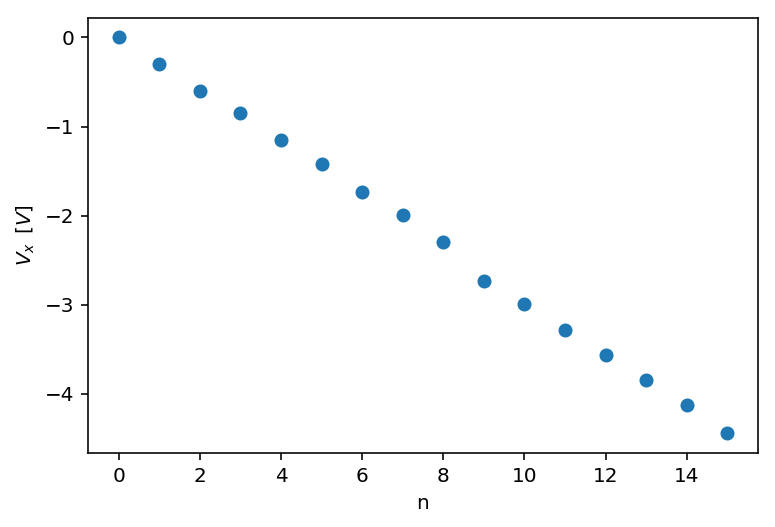

In [80]:
i = array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
xlabel("n")
ylabel("$V_x\,\,\,[V]$") 
plot(i,Vx,'o')

savefig("end.pdf")